<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.299792,49.283639,51.627379,0.165179,187.375989,187.071169,0.304821
1,0.0,1.0,74.752559,64.045590,61.112483,0.739928,210.650560,209.902327,0.748233
2,0.0,2.0,21.754798,75.743294,75.352628,-1.324942,181.525779,182.211596,-0.685817
3,0.0,3.0,42.692673,83.685796,60.358477,0.328306,197.065252,196.300269,0.764983
4,0.0,4.0,53.624878,29.900980,78.050634,0.313820,171.890313,171.279768,0.610544
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.911496,77.808221,51.562790,1.404369,178.686876,177.517525,1.169350
29996,999.0,26.0,46.008210,68.974196,37.030976,-0.383197,161.630184,162.094002,-0.463818
29997,999.0,27.0,90.627975,65.090475,92.064874,-0.760163,257.023161,257.480037,-0.456875
29998,999.0,28.0,77.085890,43.881074,64.827202,-0.341973,195.452194,195.350861,0.101333


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.299792,49.283639,51.627379,0.165179,187.375989,187.071169,0.304821
1,0.0,1.0,74.752559,64.045590,61.112483,0.739928,210.650560,209.902327,0.748233
2,0.0,2.0,21.754798,75.743294,75.352628,-1.324942,181.525779,182.211596,-0.685817
3,0.0,3.0,42.692673,83.685796,60.358477,0.328306,197.065252,196.300269,0.764983
4,0.0,4.0,53.624878,29.900980,78.050634,0.313820,171.890313,171.279768,0.610544
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.911496,77.808221,51.562790,1.404369,178.686876,177.517525,1.169350
29996,999.0,26.0,46.008210,68.974196,37.030976,-0.383197,161.630184,162.094002,-0.463818
29997,999.0,27.0,90.627975,65.090475,92.064874,-0.760163,257.023161,257.480037,-0.456875
29998,999.0,28.0,77.085890,43.881074,64.827202,-0.341973,195.452194,195.350861,0.101333


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.299792  49.283639  51.627379  ...  187.375989  187.071169  0.304821
      1.0    74.752559  64.045590  61.112483  ...  210.650560  209.902327  0.748233
      2.0    21.754798  75.743294  75.352628  ...  181.525779  182.211596 -0.685817
      3.0    42.692673  83.685796  60.358477  ...  197.065252  196.300269  0.764983
      4.0    53.624878  29.900980  78.050634  ...  171.890313  171.279768  0.610544
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   37.911496  77.808221  51.562790  ...  178.686876  177.517525  1.169350
      26.0   46.008210  68.974196  37.030976  ...  161.630184  162.094002 -0.463818
      27.0   90.627975  65.090475  92.064874  ...  257.023161  257.480037 -0.456875
      28.0   77.085890  43.881074  64.827202  ...  195.452194  195.350861  0.101333
      29.0   75.211787  67.545435  26.035901  ...  178.785996  178.654563  0.131433

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.299792  49.283639  51.627379  ...  187.375989  187.071169  0.304821
      1.0    74.752559  64.045590  61.112483  ...  210.650560  209.902327  0.748233
      2.0    21.754798  75.743294  75.352628  ...  181.525779  182.211596 -0.685817
      3.0    42.692673  83.685796  60.358477  ...  197.065252  196.300269  0.764983
      4.0    53.624878  29.900980  78.050634  ...  171.890313  171.279768  0.610544
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   37.911496  77.808221  51.562790  ...  178.686876  177.517525  1.169350
      26.0   46.008210  68.974196  37.030976  ...  161.630184  162.094002 -0.463818
      27.0   90.627975  65.090475  92.064874  ...  257.023161  257.480037 -0.456875
      28.0   77.085890  43.881074  64.827202  ...  195.452194  195.350861  0.101333
      29.0   75.211787  67.545435  26.035901  ...  178.785996  178.654563  0.131433

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.299792,49.283639,51.627379,0.165179,187.375989,187.071169,0.304821
1,0.0,1.0,74.752559,64.045590,61.112483,0.739928,210.650560,209.902327,0.748233
2,0.0,2.0,21.754798,75.743294,75.352628,-1.324942,181.525779,182.211596,-0.685817
3,0.0,3.0,42.692673,83.685796,60.358477,0.328306,197.065252,196.300269,0.764983
4,0.0,4.0,53.624878,29.900980,78.050634,0.313820,171.890313,171.279768,0.610544
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.911496,77.808221,51.562790,1.404369,178.686876,177.517525,1.169350
29996,999.0,26.0,46.008210,68.974196,37.030976,-0.383197,161.630184,162.094002,-0.463818
29997,999.0,27.0,90.627975,65.090475,92.064874,-0.760163,257.023161,257.480037,-0.456875
29998,999.0,28.0,77.085890,43.881074,64.827202,-0.341973,195.452194,195.350861,0.101333


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.299792  49.283639  51.627379  ...  187.375989  187.071169  0.304821
      1.0    74.752559  64.045590  61.112483  ...  210.650560  209.902327  0.748233
      2.0    21.754798  75.743294  75.352628  ...  181.525779  182.211596 -0.685817
      3.0    42.692673  83.685796  60.358477  ...  197.065252  196.300269  0.764983
      4.0    53.624878  29.900980  78.050634  ...  171.890313  171.279768  0.610544
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   37.911496  77.808221  51.562790  ...  178.686876  177.517525  1.169350
      26.0   46.008210  68.974196  37.030976  ...  161.630184  162.094002 -0.463818
      27.0   90.627975  65.090475  92.064874  ...  257.023161  257.480037 -0.456875
      28.0   77.085890  43.881074  64.827202  ...  195.452194  195.350861  0.101333
      29.0   75.211787  67.545435  26.035901  ...  178.785996  178.654563  0.131433

[30000 rows x 7 columns]

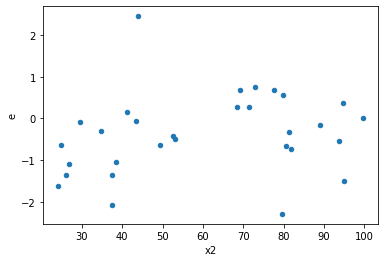

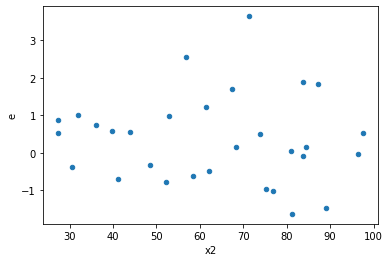

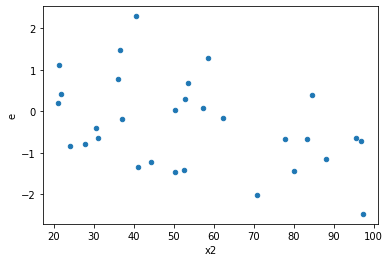

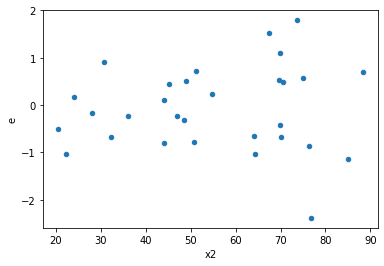

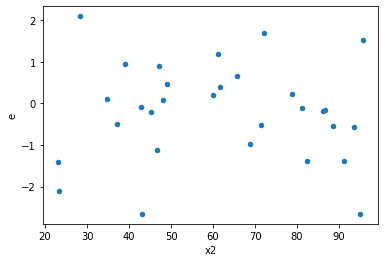

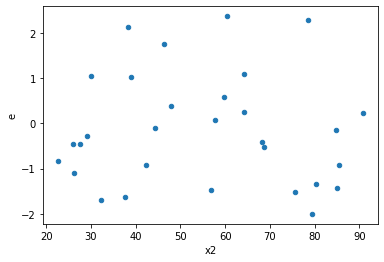

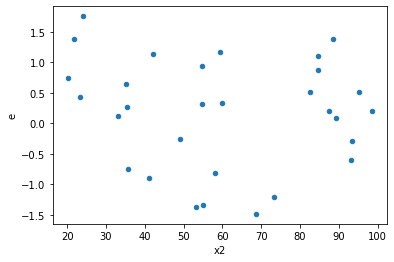

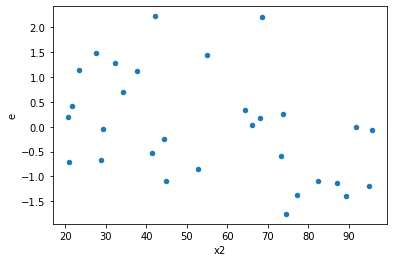

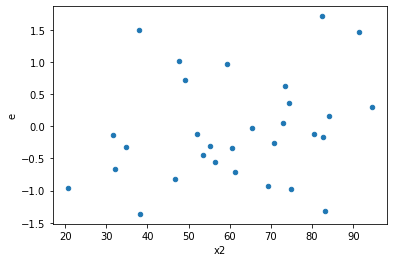

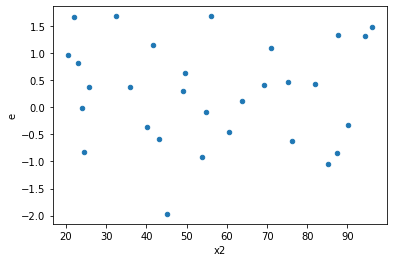

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,9.0,9.0,3.4702411849635206,16.0528556043675,0.38558235388483564,1.7836506227075002,4.6258616472895815,0.03230146959837188,0.9838492652008141,0.01615073479918594,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,3.1476076044184813,10.626876136948148,0.34973417826872016,1.180764015216461,3.3761756459193255,0.08433618652281294,0.9578319067385935,0.04216809326140647,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,5.224621497419438,11.246836589211386,0.5805134997132709,1.2496485099123762,2.1526605505808334,0.26884127682489534,0.8655793615875523,0.13442063841244767,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,4.635165479520352,17.79344334881743,0.5150183866133724,1.9770492609797143,3.838793550615306,0.05779819462515401,0.971100902687423,0.028899097312577005,Reject005=1 : Homoscedasticity
13.0,9.0,9.0,2.9368403182338363,14.432860051345505,0.3263155909148707,1.6036511168161673,4.914417703181483,0.026535428496763824,0.9867322857516181,0.013267714248381912,Reject005=0 : Heteroscedasticity
15.0,9.0,9.0,9.571485973554497,13.359076843072565,1.063498441506055,1.4843418714525072,1.3957160758510203,0.6274273038048137,0.6862863480975931,0.31371365190240685,Reject005=1 : Homoscedasticity
16.0,9.0,9.0,3.6736557540884855,4.270901699719788,0.4081839726764984,0.4745446333021987,1.1625753705873545,0.8261219529792818,0.5869390235103591,0.4130609764896409,Reject005=1 : Homoscedasticity
17.0,9.0,9.0,7.229429200393235,10.283659095715299,0.8032699111548038,1.142628788412811,1.4224717900489203,0.6080495996475495,0.6959752001762253,0.3040247998237747,Reject005=1 : Homoscedasticity
19.0,9.0,9.0,8.066894865551145,8.187817889698376,0.896321651727905,0.9097575432998196,1.0149900334840882,0.9826809642657532,0.5086595178671234,0.4913404821328766,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,8.72052111294423,4.393298188171098,0.9689467903271366,0.488144243130122,0.5037884928287077,0.32167873918133594,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,14.782156706136806,5.003168013344175,1.642461856237423,0.5559075570382417,0.33845994957333336,0.12225960552724825,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,9.40215979584164,7.987788180760785,1.0446844217601823,0.8875320200845317,0.8495694983075698,0.8120945647357802,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,10.188776222354438,6.846360707919815,1.1320862469282709,0.7607067453244238,0.671951229324158,0.563121380477368,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,3.4702411849635206,16.0528556043675,0.38558235388483564,1.7836506227075002,4.6258616472895815,0.03230146959837188,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,3.1476076044184813,10.626876136948148,0.34973417826872016,1.180764015216461,3.3761756459193255,0.08433618652281294,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,8.159970450543101,7.726013005444641,0.9066633833936779,0.858445889493849,0.9468187479686796,0.9364556354142157,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,5.224621497419438,11.246836589211386,0.5805134997132709,1.2496485099123762,2.1526605505808334,0.26884127682489534,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,4.635165479520352,17.79344334881743,0.5150183866133724,1.9770492609797143,3.838793550615306,0.05779819462515401,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      943
Reject005=0 : Heteroscedasticity     57
Name: Result_test, dtype: int64